In [2]:
import torch
import os
from model_hyperbolic import GPTConfig, GPT

checkpoint_path = os.path.join('/raid/out-tinystories', 'ckpt_hyperbolic.pt')
# Load the checkpoint
checkpoint = torch.load(checkpoint_path, map_location='cpu')

# Load the model arguments from the checkpoint
model_args = checkpoint['model_args']

# Initialize the model with the loaded config
gpt_config = GPTConfig(**model_args)
model = GPT(gpt_config)

# Load the model state dictionary
state_dict = checkpoint['model']

# Remove unwanted prefix if present
unwanted_prefix = '_orig_mod.'
for k in list(state_dict.keys()):
    if k.startswith(unwanted_prefix):
        state_dict[k[len(unwanted_prefix):]] = state_dict.pop(k)

# Load state dict into the model
model.load_state_dict(state_dict)

number of parameters: 4.37M


<All keys matched successfully>

In [3]:
model.transformer.h

ModuleList(
  (0-11): 12 x Block(
    (ln_1): LayerNorm()
    (attn): CausalSelfAttention(
      (c_attn): Linear(in_features=72, out_features=216, bias=False)
      (c_proj): Linear(in_features=72, out_features=72, bias=False)
      (attn_dropout): Dropout(p=0.2, inplace=False)
      (resid_dropout): Dropout(p=0.2, inplace=False)
    )
    (ln_2): LayerNorm()
    (mlp): MLP(
      (c_fc): Linear(in_features=72, out_features=288, bias=False)
      (gelu): GELU(approximate='none')
      (c_proj): Linear(in_features=288, out_features=72, bias=False)
      (dropout): Dropout(p=0.2, inplace=False)
    )
  )
)

In [14]:
# Iterate through the layers and print the value of the 'c' parameter in hyperbolic mode
for i, block in enumerate(model.transformer.h):
    # if isinstance(block.attn, CausalSelfAttention) and block.attn.mode == 'hyperbolic':
    # print(f"Layer {i}: c = {block.attn.c.item():.3f}")
    qkv = block.attn.c_attn.weight
    q, k, v = qkv.split(72)
    break

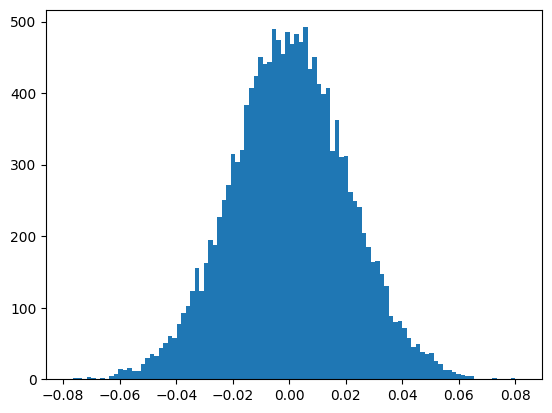

In [20]:
import matplotlib.pyplot as plt
plt.hist(qkv.flatten().detach().numpy(), bins=100)
plt.show()

In [9]:
for i, block in enumerate(model.transformer.h):
    for name, param in block.named_parameters():
        print(f"Name: {name} | Shape: {param.shape} | Requires Grad: {param.requires_grad}")
    break

Name: ln_1.weight | Shape: torch.Size([72]) | Requires Grad: True
Name: attn.c | Shape: torch.Size([]) | Requires Grad: True
Name: attn.c_attn.weight | Shape: torch.Size([216, 72]) | Requires Grad: True
Name: attn.c_proj.weight | Shape: torch.Size([72, 72]) | Requires Grad: True
Name: ln_2.weight | Shape: torch.Size([72]) | Requires Grad: True
Name: mlp.c_fc.weight | Shape: torch.Size([288, 72]) | Requires Grad: True
Name: mlp.c_proj.weight | Shape: torch.Size([72, 288]) | Requires Grad: True
